In [100]:
import os
import numpy as np
import scipy as sp
import scipy.fftpack
from scipy import signal
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

The essence of Fourier transfer is to turn a time-domain signal into frequency-domain, as many complicated signals in time domain could be largely simplified for analysis and manipulation in frequency domain. The composition of sine waves with different frequencies can lead to a squarewave. I will use this example to refresh the notions of Fourier transfer. 

$$sq(t) = \frac{4}{\pi}\sum_{\text{$k=1$, $k$ odd}}^\infty \frac{\sin(2\pi k f t)}{k} = \frac{4}{\pi} \left( \sin(2\pi f t) + (1/3) \sin(2\pi 3 f t) + (1/5)\sin(2\pi 5 ft) + \ldots\right)$$

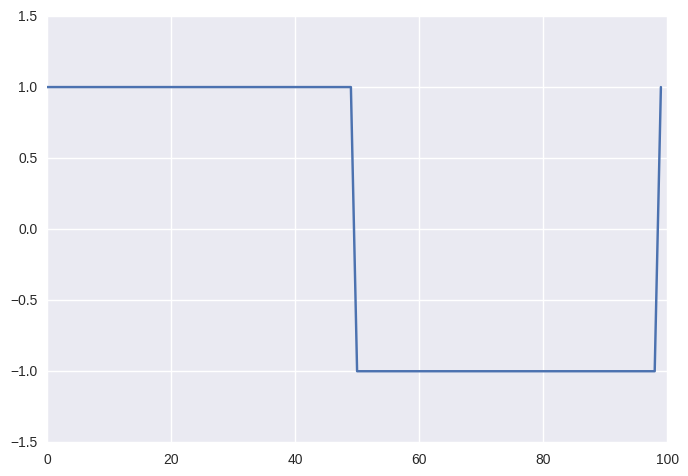

In [107]:
N = 100
x = np.linspace(0, 1, N)
y = np.ones(N)
y[x > 0.5] = -1

sqw = sp.signal.square(2*np.pi*x)

def f(Y,x, N):
    total = 0
    for ctr in range(len(Y)):
        total += Y[ctr] * (np.cos(x*ctr*2*np.pi/N) + 1j*np.sin(x*ctr*2*np.pi/N))
    return np.real(total)

Y=np.fft.fft(sqw)/N
xs = range(N)
plt.plot(xs, [f(Y, i, N) for i in xs])
plt.show()

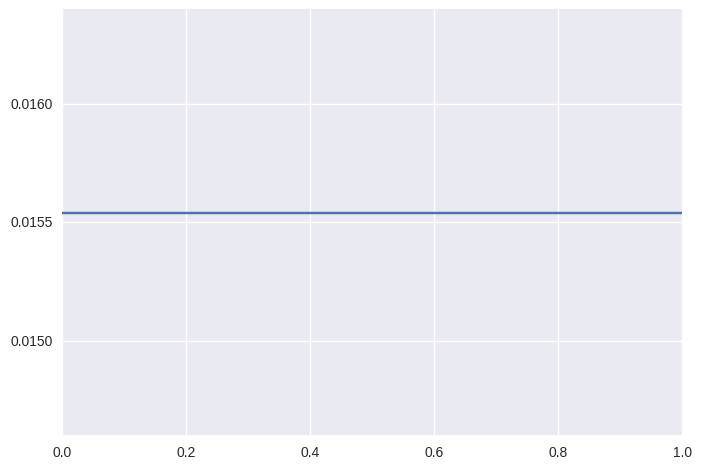

In [117]:
magnitude = np.abs(Y)
angle = np.angle(Y)
y0 = np.zeros(N)
for a, m in zip(angle, magnitude):
    y0 += m*np.sin(2*np.pi*a)
plt.plot(x, y0)
plt.show()